# **SaaS Analytics**

# **Background**

### **Konteks**

AWS, atau Amazon Web Services, adalah platform cloud computing yang disediakan oleh Amazon. AWS menawarkan berbagai layanan dan sumber daya komputasi, penyimpanan, dan manajemen data yang dapat diakses secara fleksibel melalui internet. AWS memungkinkan individu, perusahaan, dan organisasi untuk membangun dan mengelola aplikasi, menyimpan dan mengakses data, serta menjalankan beban kerja IT tanpa harus mengelola infrastruktur fisik secara langsung. Layanan AWS mencakup komputasi awan (EC2), penyimpanan awan (S3), database awan (RDS), dan banyak lagi, memungkinkan pengguna untuk skalabilitas dan mengelola sumber daya IT mereka dengan mudah sesuai kebutuhan mereka. AWS saat ini menjadi penyedia layanan cloud terkemuka dan banyak digunakan di seluruh dunia.

AWS terkategori dalam beberapa model layanan cloud computing yang mencakup berbagai kebutuhan IT dan pengembangan aplikasi. Diantaranya:
- Infrastructure as a Service (IaaS),
- Platform as a Service (PaaS),
- Software as a Service (SaaS),
- Serverless Computing,
- Database as a Service (DBaaS),
- Networking Services,
- Identity and Access Management (IAM),
- Content Delivery Services

Dalam Kasus ini, SaaS merupakan salah satu layanan penting yang menjadi pilihan utama untuk banyak organisasi. Karena kelebihannya:
1. Akses Fleksibel: Dapat diakses dari mana saja dan kapan saja.
2. Pemeliharaan Otomatis: Penyedia SaaS tanggung jawab pemeliharaan dan pembaruan.
3. Biaya Operasional Lebih Rendah: Mengurangi biaya modal dan biaya operasional lebih terukur.
4. Skalabilitas Mudah: Mudah menyesuaikan kapasitas tanpa investasi besar.
5. Pembaruan Tepat Waktu: Perbaikan dan pembaruan keamanan dilakukan cepat.
6. Manajemen Akses dan Keamanan: Penyedia SaaS menyediakan kontrol akses dan keamanan.
7. Penerapan Cepat: Implementasi lebih cepat daripada model perangkat lunak tradisional.
8. ***Pilihan Aplikasi yang Luas: Berbagai aplikasi SaaS untuk berbagai kebutuhan bisnis.***

Namun dalam Dataset ini, ditemukan banyak profit minus dalam data penjualan produk SaaS.
Oleh sebab itu penulis melakukan analisis mendalam terhadap data penjualan SaaS agar Layanan AWS ini semakin berkembang dan tidak menemukan kendala financial yang memungkinkan pemberhentian setiap layanannya.

### **Permasalahan & Goals**

Target dari penjualan SaaS ini yaitu mencari keuntungan dengan mempertimbangkan harga yang ditawarkan dan diskon yang diberikan. Untuk itu penulis akan membagi analisis ini dari 4 pendekatan:

1. Pengaruh Produk
    - Identifikasi produk-produk yang memiliki prospek pertumbuhan yang tinggi
    - Identifikasi produk-produk yang memiliki kontribusi rendah terhadap keuntungan
2. Analisis Penjualan
    - Analisis siklus penjualan berdasarkan waktu
    - Identifikasi setiap kategori berdasarkan nilai penjualan
3. Pengaruh Customer
    - Analisis Customer yang paling dan tidak berpengaruh terhadap keuntungan
    - Identifikasi kebutuhan customer berdasarkan kategori yang ada
    - Identifikasi loyalitas customer
4. Analisis Profit
    - Pengaruh diskon terhadap keuntungan
    - Identifikasi setiap kategori berdasarkan keuntungan yang didapatkan
    - Analisis faktor yang mempengaruhi keuntungan

# **Load Dataset**

**Import Dataset, Library dan mendefinisikan fungsi yang diperlukan**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Source dataset AWS Saas-Sales.csv diambil dari https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales

In [154]:
raw = pd.read_csv('SaaS-Sales.csv')
data = raw

In [155]:
def check(x):
    pd.set_option('display.max_colwidth', None)
    display(f'{raw.shape} Raw', f'{x.shape} Cleaned', pd.DataFrame({
        'feature': x.columns.values,
        'data_type': x.dtypes.values,
        'null_value': [x[col].isna().sum() for col in x.columns],
        '%null_value': pd.Series(np.round(x.isna().mean().values * 100, 2)).apply(lambda x: str(x)+' %'),
        'n_unique': x.nunique().values,
        'unique' : [x[col].unique() for col in x.columns]}))

# def view(judul, xdata, xlabel, ydata, ylabel, xsize = 10, ysize = 5):
#     plt.figure(figsize = (xsize, ysize))
#     plt.title(judul)
#     sns.barplot(x= xdata, y= ydata)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.legend()
#     plt.show()


**Melihat bentuk data dengan menampilkan 5 baris teratas**

In [156]:
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# **Data Understanding**

Dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B).

- ***Setiap `baris` mewakili sebuah `transaksi` dari satu produk.***

| No. | Fitur | Deskripsi |
|-|-|-|
| 1. | **Row ID** | Identifikasi unik untuk setiap transaksi. |
| 2. | **Order ID** | Identifikasi unik untuk setiap pesanan. |
| 3. | **Order Date** | Tanggal ketika pesanan ditempatkan. |
| 4. | **Date Key** | Representasi numerik dari tanggal pesanan (YYYYMMDD). |
| 5. | **Contact Name** | Nama orang yang melakukan pemesanan. |
| 6. | **Country** | Negara tempat pesanan ditempatkan. |
| 7. | **City** | Kota tempat pesanan ditempatkan. |
| 8. | **Region** | Wilayah tempat pesanan ditempatkan. |
| 9. | **Subregion** | Subwilayah tempat pesanan ditempatkan. |
| 10. | **Customer** | Nama perusahaan yang melakukan pemesanan. |
| 11. | **Customer ID** | Identifikasi unik untuk setiap pelanggan. |
| 12. | **Industry** | Industri tempat pelanggan berada. |
| 13. | **Segment** | Segmen pelanggan (SMB, Strategis, Enterprise, dll.). |
| 14. | **Product** | Produk yang dipesan. |
| 15. | **License** | Kunci lisensi untuk produk. |
| 16. | **Sales** | Jumlah total penjualan untuk transaksi. |
| 17. | **Quantity** | Jumlah total barang dalam transaksi. |
| 18. | **Discount** | Diskon yang diterapkan pada transaksi. |
| 19. | **Profit** | Keuntungan dari transaksi. |


# **Cleansing**

### **Mengecek null & duplikat data**

In [157]:
check(data)

'(9994, 19) Raw'

'(9994, 19) Cleaned'

,feature,data_type,null_value,%null_value,n_unique,unique
0,Row ID,int64,0,0.0 %,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,object,0,0.0 %,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,object,0,0.0 %,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,int64,0,0.0 %,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 2

**Mengecek apakah ada ```record``` yang ter```duplikat```. Jika ada maka akan dihapus, karena akan membuat data analysis kurang valid**

In [158]:
data[data.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


### **Drop Unnecessary Table**

In [159]:
display(
    data[['Date Key', 'Order Date']].value_counts(),
    data['License'].value_counts(),
    data[['Customer', 'Customer ID']].value_counts()
)


Date Key  Order Date
20220906  9/6/2022      38
20230903  9/3/2023      36
20221111  11/11/2022    35
20231203  12/3/2023     34
20231202  12/2/2023     34
                        ..
20220301  3/1/2022       1
20220308  3/8/2022       1
20220331  3/31/2022      1
20220403  4/3/2022       1
20220203  2/3/2022       1
Name: count, Length: 1237, dtype: int64

License
16GRM07R1K    1
Y8TULY7XSD    1
OL8LUB2422    1
4YLZ318U2E    1
NVAYXZ2NB5    1
             ..
4QCWULG76F    1
OZFTJG725G    1
R2G2Z3TP04    1
415425LE8Q    1
3NTBV9B3PS    1
Name: count, Length: 9994, dtype: int64

Customer            Customer ID
Allianz             1080           192
Tyson Foods         1088           184
Ford Motor          1009           176
Siemens             1043           170
Comcast             1022           161
                                  ... 
Tesco               1059            48
Alphabet            1053            44
Berkshire Hathaway  1012            39
Safeway             1079            39
Citigroup           1020            22
Name: count, Length: 99, dtype: int64

In [160]:
data.drop(['Row ID', 'Date Key', 'License', 'Customer ID'], axis = 1, inplace= True)

Alasan hapus variable
- `Row id`: karna unique value sebanyak jumlah row
- `Date Key` : karna identik dengan `Order Date`
- `License` : karna unique value sebanyak jumalh row
- `Customer ID` : karna identik dengan `Customer`

Mengecek ```perbedaan``` setelah melakukan drop table

In [161]:
data.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


### **Mengecek unique value setiap variabel**

Tujuan dari mengecek setiap value dalam setiap variabel adalah untuk mencari apakah ada `rare value` atau `inkonsisten value` disetiap variabelnya.

Kita lihat dulu semua kolom (variabel) yang ada dalam dataset:

In [162]:
data.columns.values

array(['Order ID', 'Order Date', 'Contact Name', 'Country', 'City',
       'Region', 'Subregion', 'Customer', 'Industry', 'Segment',
       'Product', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype=object)

##### Mengecek Variabel `Order ID`

In [163]:
np.sort(data['Order ID'].unique())

array(['AMER-2020-100090', 'AMER-2020-100279', 'AMER-2020-100363', ...,
       'EMEA-2023-169929', 'EMEA-2023-169978', 'EMEA-2023-169999'],
      dtype=object)

In [164]:
data['Order ID'].value_counts()

Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64

##### Mengecek Variabel `Order Date`

In [165]:
np.sort(data['Order Date'].unique())

array(['1/1/2023', '1/10/2020', '1/10/2021', ..., '9/9/2020', '9/9/2022',
       '9/9/2023'], dtype=object)

In [166]:
data['Order Date'].value_counts()

Order Date
9/6/2022      38
9/3/2023      36
11/11/2022    35
12/2/2023     34
12/3/2023     34
              ..
2/25/2022      1
10/26/2022     1
2/22/2020      1
10/19/2022     1
1/22/2020      1
Name: count, Length: 1237, dtype: int64

Mengubah tipe Variable `Order Date` menjadi datetime

In [167]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Industry      9994 non-null   object        
 9   Segment       9994 non-null   object        
 10  Product       9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

##### Mengecek Variabel `Contact Name`

In [168]:
np.sort(data['Contact Name'].unique())

array(['Abigail Langdon', 'Adam Davidson', 'Adam James', 'Adam Manning',
       'Adam Nash', 'Adrian Abraham', 'Adrian Clarkson', 'Adrian Hunter',
       'Adrian Poole', 'Adrian Walker', 'Alan Bailey', 'Alan Berry',
       'Alan Gill', 'Alan Graham', 'Alan Hudson', 'Alan White',
       'Alexander Duncan', 'Alexander Hill', 'Alexander James',
       'Alexander Langdon', 'Alexander Martin', 'Alexander Pullman',
       'Alexander Wallace', 'Alexandra Dyer', 'Alexandra May',
       'Alexandra Morrison', 'Alexandra Sharp', 'Alexandra Slater',
       'Alison Coleman', 'Alison Davidson', 'Alison Fisher',
       'Alison Howard', 'Alison Miller', 'Alison Mills',
       'Amelia Campbell', 'Amelia Chapman', 'Amelia Kelly', 'Amelia Lee',
       'Amelia Martin', 'Amy Edmunds', 'Amy Paterson', 'Amy Scott',
       'Amy Simpson', 'Andrea Hill', 'Andrea Hughes', 'Andrea Hunter',
       'Andrea Rampling', 'Andrea Reid', 'Andrew Lee', 'Andrew Lewis',
       'Andrew Miller', 'Andrew Reid', 'Andrew Sanders

In [169]:
data['Contact Name'].value_counts()

Contact Name
Leonard Kelly       37
Gordon Parr         34
Amelia Campbell     34
Tracey Dickens      34
Evan Ince           32
                    ..
Joshua Gibson        1
Brian Campbell       1
Alexander Duncan     1
Frank Ferguson       1
Sam Randall          1
Name: count, Length: 793, dtype: int64

##### Mengecek Variabel `Country`

In [170]:
np.sort(data['Country'].unique())

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [171]:
data['Country'].value_counts()

Country
United States           2001
United Kingdom          1141
Japan                    985
France                   587
Canada                   506
Australia                492
Mexico                   469
Germany                  383
Brazil                   255
Sweden                   249
Chile                    224
Spain                    224
Finland                  184
South Africa             183
Russia                   182
India                    149
South Korea              135
Argentina                130
Ireland                  126
Belgium                  124
Italy                    110
China                    105
Philippines               96
Luxembourg                89
Saudi Arabia              82
Poland                    66
Singapore                 66
Portugal                  61
United Arab Emirates      60
Norway                    56
Ukraine                   53
Turkey                    53
Netherlands               45
Czech Republic            42
Colomb

##### Mengecek Variabel `City`

In [172]:
np.sort(data['City'].unique())

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

In [173]:
data['City'].value_counts()

City
London           922
New York City    740
Paris            537
Los Angeles      510
Toronto          431
                ... 
Huntsville         1
Chengdu            1
Lawrence           1
Clinton            1
Ljubljana          1
Name: count, Length: 262, dtype: int64

##### Mengecek Variabel `Region`

In [174]:
np.sort(data['Region'].unique())

array(['AMER', 'APJ', 'EMEA'], dtype=object)

In [175]:
data['Region'].value_counts()

Region
EMEA    4219
AMER    3665
APJ     2110
Name: count, dtype: int64

#### *Mengecek Variabel ```Subregion```*

In [176]:
np.sort(data['Subregion'].unique())

array(['ANZ', 'APAC', 'EU', 'EU-EAST', 'EU-WEST', 'IND', 'JAPN', 'LATAM',
       'MEA', 'NAMER', 'NOR', 'UKIR'], dtype=object)

In [177]:
data['Subregion'].value_counts()

Subregion
NAMER      2507
EU-WEST    1614
UKIR       1267
LATAM      1158
JAPN        985
ANZ         529
NOR         489
APAC        447
MEA         396
EU-EAST     343
IND         149
EU          110
Name: count, dtype: int64

#### *Mengecek Variabel ```Customer```*

In [178]:
np.sort(data['Customer'].unique())

array(['AT&T', 'Abbott Laboratories', 'Aetna', 'Airbus', 'Allianz',
       'Allstate', 'Alphabet', 'Amazon', 'American Express',
       'AmerisourceBergen', 'Anthem', 'Apple', 'Aviva', 'BMW',
       'BNP Paribas', 'Banco Santander', 'Bank of America Corp.',
       'Berkshire Hathaway', 'Boeing', 'Bosch', 'CVS Health', 'Carrefour',
       'Caterpillar', 'Chevron', 'China National Petroleum', 'Cigna',
       'Cisco Systems', 'Citigroup', 'Coca-Cola', 'Comcast',
       'ConocoPhillips', 'Costco Wholesale', 'Daimler', 'Enel', 'Engie',
       'Exxon Mobil', 'Fannie Mae', 'FedEx', 'Ford Motor', 'Gazprom',
       'General Electric', 'General Motors', 'Glencore',
       'Goldman Sachs Group', 'HSBC Holdings', 'Home Depot',
       'HonHai Precision Industry', 'Honda Motor', 'Huawei', 'Humana',
       'Intel', 'Itochu', 'J.P. Morgan Chase & Co.', 'Johnson & Johnson',
       'Kroger', 'Lowes', 'Lukoil', 'Marathon Petroleum', 'McKesson',
       'Merck', 'Microsoft', 'Mitsubishi', 'Mondelez Interna

In [179]:
data['Customer'].value_counts()

Customer
Allianz               192
Tyson Foods           184
Ford Motor            176
Siemens               170
Comcast               161
                     ... 
Tesco                  48
Alphabet               44
Berkshire Hathaway     39
Safeway                39
Citigroup              22
Name: count, Length: 99, dtype: int64

#### *Mengecek Variabel ```Industry```*

In [180]:
np.sort(data['Industry'].unique())

array(['Communications', 'Consumer Products', 'Energy', 'Finance',
       'Healthcare', 'Manufacturing', 'Misc', 'Retail', 'Tech',
       'Transportation'], dtype=object)

In [181]:
data['Industry'].value_counts()

Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64

#### *Mengecek Variabel ```Segment```*

In [182]:
np.sort(data['Segment'].unique())

array(['Enterprise', 'SMB', 'Strategic'], dtype=object)

In [183]:
data['Segment'].value_counts()

Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64

#### *Mengecek Variabel ```Product```*

In [184]:
np.sort(data['Product'].unique())

array(['Alchemy', 'Big Ol Database', 'ChatBot Plugin', 'ContactMatcher',
       'Data Smasher', 'FinanceHub', 'Marketing Suite',
       'Marketing Suite - Gold', 'OneView', 'SaaS Connector Pack',
       'SaaS Connector Pack - Gold', 'Site Analytics', 'Storage',
       'Support'], dtype=object)

In [185]:
data['Product'].value_counts()

Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

#### *Mengecek Variabel ```Sales```*

mengecek unique value pada var sales

In [186]:
np.sort(data['Sales'].unique())

array([4.440000e-01, 5.560000e-01, 8.360000e-01, ..., 1.399996e+04,
       1.749995e+04, 2.263848e+04])

Dengan melihat data yang banyak dan continues, kita bisa memfilter data anomali dengan mengasumsikan anomali pada ```Sales``` adalah ketika bernilai ```Minus atau sangat tinggi menjauhi median dataset```. Berikut kita lakukan filter nilai minus:

In [187]:
data[data['Sales'] < 0]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit


Tidak ditemukan nilai minus pada var ```Sales```. Selanjutnya kita akan mencari value yang ```memiliki rentang jauh dari mediannya```.

([<matplotlib.axis.YTick at 0x177ead01220>,
 [Text(0, 0, '0'),
  Text(0, 3000, '3000'),
  Text(0, 6000, '6000'),
  Text(0, 9000, '9000'),
  Text(0, 12000, '12000'),
  Text(0, 15000, '15000'),
  Text(0, 18000, '18000'),
  Text(0, 21000, '21000')])

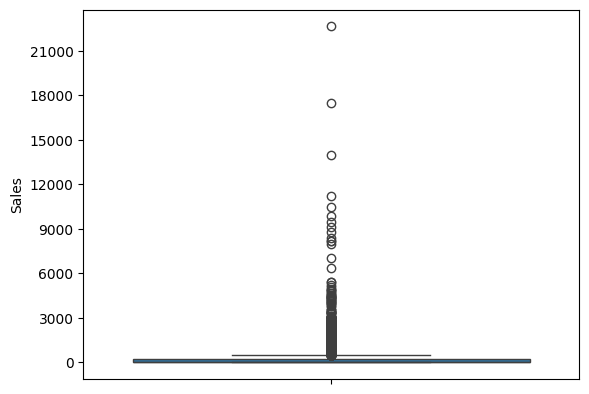

In [188]:
sns.boxplot(y=data['Sales'])
plt.yticks(ticks = range(0, 24000, 3000))

Kita bisa lihat ada 3 record yang diduga sebagai anomalies

In [189]:
data[data['Sales'] > 12000]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
2697,EMEA-2020-145317,2020-03-18,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,Healthcare,Enterprise,Big Ol Database,22638.48,6,0.5,-1811.0784
6826,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,Alchemy,17499.95,5,0.0,8399.9760
8153,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,Consumer Products,SMB,Alchemy,13999.96,4,0.0,6719.9808


Pertama var ```Product``` dengan value ```Big Ol Database``` akan kita jabarkan untuk melihat penyebab nilainya sangat tinggi

In [190]:
data[data['Product'] == 'Big Ol Database'][['Customer', 'Country', 'Quantity', 'Sales', 'Profit']].sort_values('Sales', ascending= False).head(20)

,Customer,Country,Quantity,Sales,Profit
2697,Anthem,Germany,6,22638.480,-1811.0784
4277,Lowes,Argentina,7,9099.930,2365.9818
8488,Honda Motor,Spain,5,8749.950,2799.9840
165,Nissan Motor,Japan,8,8159.952,-1359.9920
683,Costco Wholesale,Sweden,4,7999.980,-3839.9904
6626,Johnson & Johnson,United Kingdom,4,6999.960,2239.9872
6340,Phillips 66,United Kingdom,4,5199.960,1351.9896
1085,Fannie Mae,United Kingdom,7,4899.930,2400.9657
4218,Ford Motor,United States,2,4799.984,359.9988
8204,AT&T,United Kingdom,4,4643.800,2229.0240


Setelah melihat sebaran data dari product ```Big Ol Database``` kita akan mencoba berasumsi apakah penyebab tingginya harga disebabkan karena ```bukan customer yang loyal```, yaitu yang belum memiliki banyak transaksi terhadap SaaS

In [191]:
data[data['Customer'] == 'Anthem']['Order ID'].count()

134

Ternyata ```Anthem``` sebagai customer yang dicurigai sebagai customer tidak loyal tidak valid karena justru telah melakukan cukup banyak transaksi

In [192]:
display(
data[data['Customer'] == 'Anthem']['Profit'].sum(),
data[data['Profit'] > 0]['Profit'].sum())


5953.203799999999

442528.3074

Ditambah dengan keuntungan yang dihasilkan oleh customer  ```Anthem``` bisa dikatakan lumayan tinggi. Sedangkan pada record yang sama justru ```Profit``` yang dihasilkan bernilai ```minus``` berbanding terbalik dengan value ```Sales```nya. Maka record tersebut layak disebut sebagai anomali dan dihapus.

In [193]:
data.drop(2697)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.6000,4,0.00,13.3200


Selanjutnya kita akan melihat sebaran data dari product ```Alchemy```

In [194]:
data[data['Product'] == 'Alchemy'][['Customer', 'Country', 'Quantity', 'Sales', 'Profit']].sort_values('Sales', ascending= False).head(20)

,Customer,Country,Quantity,Sales,Profit
6826,Coca-Cola,India,5,17499.950,8399.9760
8153,Mondelez International,Canada,4,13999.960,6719.9808
2623,Trafigura Group,United Kingdom,4,11199.968,3919.9888
4190,Lowes,Philippines,3,10499.970,5039.9856
6425,BMW,France,4,8399.976,1119.9968
7666,Glencore,Norway,9,5399.910,2591.9568
8990,BNP Paribas,Poland,7,4899.930,2302.9671
3273,Costco Wholesale,United States,6,3359.952,1049.9850
1644,Humana,Canada,7,3149.930,1480.4671
5562,American Express,Finland,5,2999.950,1439.9760


Setelah kita melakukan filter terhadap Product ```Alchemy``` dengan melihat record yang diasumsikan memiliki anomali pada variable ```Sales```, kita dapat menyimpulkan bahwa record ini tidak bersifat anomali karena profit yang dihasilkan merupakan profit paling tinggi dibanding lainnya. Ini menunjukkan bahwa tingginya harga ```Sales``` adalah sesuai dengan profitnya.

#### *Mengecek Variabel ```Quantity```*

Dengan melihat Unique value pada var ```Quantity``` kita bisa melihat apakah ada value yang bernilai minus (imajinatif) dan yang bernilai cacah.

In [195]:
np.sort(data['Quantity'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

Tidak terdapat data anomali pada ```Quantity```. Selanjutnya kita akan melihat frekuensi valuenya.

In [196]:
data['Quantity'].value_counts()

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

#### *Mengecek Variabel ```Discount```*

In [197]:
np.sort(data['Discount'].unique())

array([0.  , 0.1 , 0.15, 0.2 , 0.3 , 0.32, 0.4 , 0.45, 0.5 , 0.6 , 0.7 ,
       0.8 ])

Disini Kita Mengasumsikan secara common sence bahwa anomali pada diskon bisa terjadi ketika nilai diskon bernilai minus dan diskon lebih dari 100% (1.0). Namun tidak terdapat anomali pada diskon

In [198]:
data['Discount'].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

#### *Mengecek Variabel ```Profit```*

In [199]:
np.sort(data['Profit'].unique())

array([-6599.978 , -3839.9904, -3701.8928, ...,  5039.9856,  6719.9808,
        8399.976 ])

In [200]:
data['Profit'].value_counts()

Profit
0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: count, Length: 7287, dtype: int64

([<matplotlib.axis.YTick at 0x177eae0d970>,
 [Text(0, -7000, '−7000'),
  Text(0, -6500, '−6500'),
  Text(0, -6000, '−6000'),
  Text(0, -5500, '−5500'),
  Text(0, -5000, '−5000'),
  Text(0, -4500, '−4500'),
  Text(0, -4000, '−4000'),
  Text(0, -3500, '−3500'),
  Text(0, -3000, '−3000'),
  Text(0, -2500, '−2500'),
  Text(0, -2000, '−2000'),
  Text(0, -1500, '−1500'),
  Text(0, -1000, '−1000'),
  Text(0, -500, '−500'),
  Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000'),
  Text(0, 3500, '3500'),
  Text(0, 4000, '4000'),
  Text(0, 4500, '4500'),
  Text(0, 5000, '5000'),
  Text(0, 5500, '5500'),
  Text(0, 6000, '6000'),
  Text(0, 6500, '6500'),
  Text(0, 7000, '7000'),
  Text(0, 7500, '7500'),
  Text(0, 8000, '8000'),
  Text(0, 8500, '8500')])

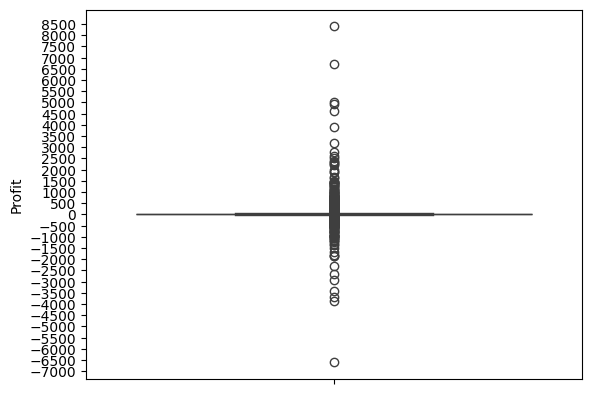

In [201]:
sns.boxplot(y=data['Profit'])
plt.yticks(ticks = range(-7000, 9000, 500))

Kita bisa melihat ada terduga ```3 anomalis``` pada var ```Profit``` yaitu diatas 2 value 6000 dan 1 value dibawah -5000

In [202]:
data[(data['Profit'] > 6000) | (data['Profit'] < -5000)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
6826,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,Alchemy,17499.950,5,0.0,8399.9760
7772,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,Finance,SMB,Big Ol Database,4499.985,5,0.7,-6599.9780
8153,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,Consumer Products,SMB,Alchemy,13999.960,4,0.0,6719.9808


In [203]:
data[data['Product'] == 'Alchemy'][['Customer', 'Country', 'Quantity', 'Sales', 'Profit']].sort_values('Profit', ascending= False).head(20)

,Customer,Country,Quantity,Sales,Profit
6826,Coca-Cola,India,5,17499.950,8399.9760
8153,Mondelez International,Canada,4,13999.960,6719.9808
4190,Lowes,Philippines,3,10499.970,5039.9856
2623,Trafigura Group,United Kingdom,4,11199.968,3919.9888
7666,Glencore,Norway,9,5399.910,2591.9568
8990,BNP Paribas,Poland,7,4899.930,2302.9671
1644,Humana,Canada,7,3149.930,1480.4671
5562,American Express,Finland,5,2999.950,1439.9760
515,FedEx,Netherlands,5,2999.950,1379.9770
6425,BMW,France,4,8399.976,1119.9968


dengan melihat interval profit yang lumayan besar, kita akan melihat dataset pada transaksi yang dilakukan dengan customer ```Coca-Cola``` dan Country ```India```

In [204]:
data[(data['Customer'] ==  'Coca-Cola')&(data['Product'] == 'Alchemy')].sort_values('Profit', ascending=False).head(20)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
6826,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,Alchemy,17499.95,5,0.0,8399.976


In [205]:
data[(data['Customer'] == 'Coca-Cola')&(data['Country'] == 'India')].sort_values('Profit', ascending=False).head(20)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
6826,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,Alchemy,17499.95,5,0.0,8399.9760
6827,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,ContactMatcher,735.98,2,0.0,331.1910
4943,APJ-2023-106782,2023-12-22,Ryan Ellison,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,SMB,Marketing Suite - Gold,375.34,1,0.0,18.7670
6828,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,ContactMatcher,34.37,7,0.0,16.8413
6829,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,ChatBot Plugin,33.96,2,0.0,9.5088
6825,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,Consumer Products,Strategic,Marketing Suite - Gold,32.48,2,0.0,4.8720


dengan melihat filter dataset diatas dapat disimpulkan data terduga anomalies bukan merupakan anomalies karena pada dasarnya product yang dipesan berbeda dan tidak ada ketidaksesuaian Profit dengan sales. selanjutnya kita akan mengecek value terdua anomalies yang ke 2

### **Add Usable Variable**

Menambah variable Harga satuan setiap Product dengan membagi Sales dengan Quantity

In [206]:
data['Price'] = (data['Sales'] / (1-data['Discount']))/data['Quantity']

Memisahkan ketegori bulan dan tahun sebagai variabel tersendiri

In [207]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [208]:
display(data['Year'], data['Month'])

0       2022
1       2022
2       2022
3       2021
4       2021
        ... 
9989    2020
9990    2023
9991    2023
9992    2023
9993    2023
Name: Year, Length: 9994, dtype: int32

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: Month, Length: 9994, dtype: int32

In [209]:
ExpectedMinusSales = data[data['Profit'] < 0]
ExpectedMinusSales['Expected Sales'] = ExpectedMinusSales['Sales'] - ExpectedMinusSales['Profit']
ExpectedMinusSales.groupby('Discount')[['Sales', 'Expected Sales']].median().sort_values('Discount', ascending= False)

C:\Users\ifend\AppData\Local\Temp\ipykernel_908\61144032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ExpectedMinusSales['Expected Sales'] = ExpectedMinusSales['Sales'] - ExpectedMinusSales['Profit']


,Sales,Expected Sales
Discount,,
0.80,8.7010,23.07960
0.70,12.2940,21.80760
0.60,22.4940,32.85070
0.50,301.9600,523.38060
0.45,383.4380,550.75640
0.40,313.1760,401.69235
0.32,328.3992,420.15780
0.30,344.3720,393.58390
0.20,140.7560,156.60520


In [210]:
data.to_csv('cleanedSaaS.csv')

# **Analysis**

Pertama kita akan melakukan korelasi terhadap fitur numerical, sekaligus sebagai faktor utama dalam transaksi. Tujuan melakukan korelasi adalah untuk mengetahui pengaruh satu variabel terhadap variabel lainnya, sehingga dapat memberi arah analisis selanjutnya.

In [211]:
data.columns

Index(['Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region',
       'Subregion', 'Customer', 'Industry', 'Segment', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Price', 'Year', 'Month'],
      dtype='object')

In [212]:
# membuat metrik correlasi
num = data[['Sales', 'Quantity', 'Discount', 'Profit', 'Price']].corr()
num

,Sales,Quantity,Discount,Profit,Price
Sales,1.000000,0.200795,-0.028190,0.479064,0.856567
Quantity,0.200795,1.000000,0.008623,0.066253,0.000435
Discount,-0.028190,0.008623,1.000000,-0.219487,0.072989
Profit,0.479064,0.066253,-0.219487,1.000000,0.204591
Price,0.856567,0.000435,0.072989,0.204591,1.000000


Text(0.5, 1.0, 'matrik korelasi fitur numerikal')

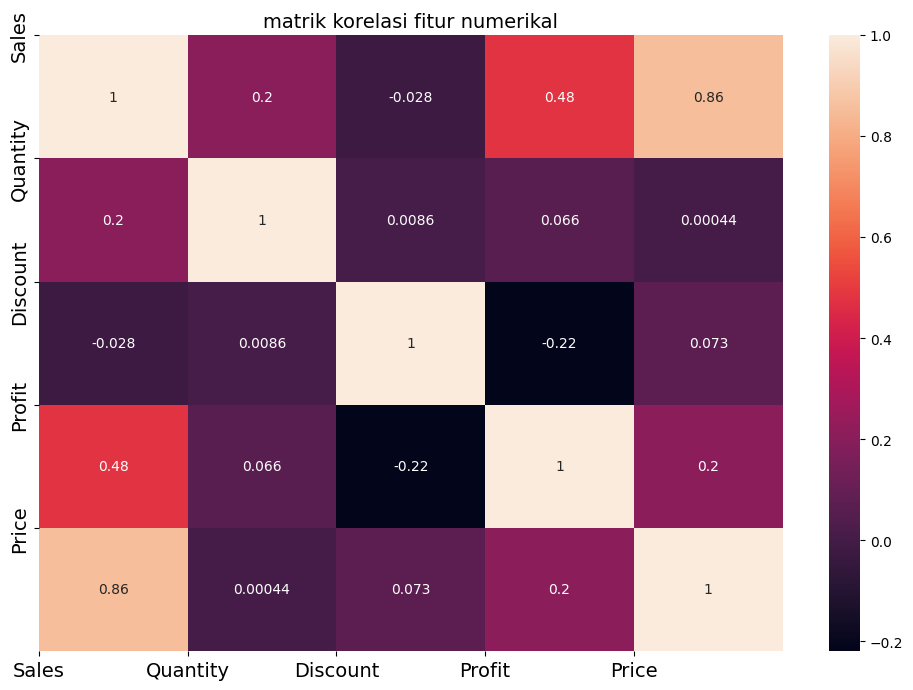

In [213]:
plt.figure(figsize=(12, 8))
sns.heatmap(num, annot=True)
plt.xticks(range(num.shape[1]), num.columns, fontsize=14) # label x
plt.yticks(range(num.shape[1]), num.columns, fontsize=14) # label y
plt.title('matrik korelasi fitur numerikal', fontsize=14)

| Nilai Korelasi | Kekuatan Hubungan |
|----------------|-------------------|
| 0.00 - 0.19    | Sangat Lemah      |
| 0.20 - 0.39    | Lemah             |
| 0.40 - 0.59    | Sedang            |
| 0.60 - 0.79    | Kuat              |
| 0.80 - 1.00    | Sangat Kuat       |

Berdasarkan tabel kekuatan hubungan diatas dapat disimpulkan:

1. Sales & Quantity (0.2) : memiliki hubungan positif yang `lemah`
    - jika nilai Quantity naik, maka nilai Sales juga naik. Begitupun sebaliknya
1. Sales & Diskon (-0.028) : memiliki hubungan negatif yang `sangat lemah`
    - jika nilai Diskon naik, maka nilai Sales menjadi turun. Begitupun sebaliknya
1. Sales & Profit (0.48) : memiliki hubungan positif yang `sedang`
    - jika nilai Sales naik, maka nilai Profit juga naik. Begitupun sebaliknya
1. Sales & Price (0.86) : memiliki hubungan positif yang `sangat kuat`
    - jika nilai Price naik, maka nilai Sales juga naik. Begitupun sebaliknya
1. Quantity & Diskon (0.0086) : memiliki hubungan positif yang `sangat lemah`
    - jika nilai Quantity naik, maka nilai Diskon juga naik. Begitupun sebaliknya
1. Quantity & Profit (0.066) : memiliki hubungan positif yang `sangat lemah`
    - jika nilai Quantity naik, maka nilai Profit juga naik. Begitupun sebaliknya
1. Quantity & Price (0.00044) : memiliki hubungan positif yang `sangat lemah`
    - jika nilai Quantity naik, maka nilai Price juga naik. Begitupun sebaliknya
1. Diskon & Profit (-0.22) : memiliki hubungan negatif yang `lemah`
    - jika nilai Diskon naik, maka nilai Profit menjadi turun. Begitupun sebaliknya
1. Diskon & Price (0.073) : memiliki hubungan negatif yang `sangat lemah`
    - jika nilai Price naik, maka nilai Diskon juga naik. Begitupun sebaliknya
1. Profit & Price (0.2) : memiliki hubungan positif yang `lemah`
    - jika nilai Price naik, maka nilai Profit juga naik. Begitupun sebaliknya

1. Pengaruh Produk
    - Identifikasi produk-produk yang memiliki prospek pertumbuhan yang tinggi
    - Identifikasi produk-produk yang memiliki kontribusi rendah terhadap keuntungan
2. Analisis Penjualan
    - Analisis siklus penjualan berdasarkan waktu
    - Identifikasi setiap kategori berdasarkan nilai penjualan
3. Pengaruh Customer
    - Analisis Customer yang paling dan tidak berpengaruh terhadap keuntungan
    - Identifikasi kebutuhan customer berdasarkan kategori yang ada
    - Identifikasi loyalitas customer
4. Analisis Profit
    - Pengaruh diskon terhadap keuntungan
    - Identifikasi setiap kategori berdasarkan keuntungan yang didapatkan
    - Analisis faktor yang mempengaruhi keuntungan

Mencari Produk apa yang paling banyak & paling sedikit menghasilkan profit,
    - sehingga bisa mengevaluasi keberlanjutan produk (continue/discontinue)
Produk apa yang paling laku berdasarkan jumlah beli produk tersebut
    - sehingga dapat melakukan kenaikan harga untuk mencari profit lebih tinggi
Mencari produk apa yang paling banyak dibeli dalam 1 kali transaksi
    - Sehingga fitur & ketersediaan dapat ditingkatkan


Mencari customer paling royal yaitu, yang paling berkontribusi dalam total profit
    - Agar dapat mempertahankan penjualan dengan perusahaan tersebut
Mencari customer yang paling paling merugikan dari total seluruh pesanannya
    - Untuk mempertimbangkan keberlanjutan Sales kepada perusahaan tersebut atau memperkesil jumlah diskon


Mencari jumlah diskon paling sering digunakan
    - Sehingga dapat mengetahui diskon yang merugikan
Mencari pengaruh diskon terhadap kerugian transaksi
    - Untuk memberikan jumlah diskon yang tepat sehingga tidak terjadi minus profit


Negara yang memiliki customer SaaS terbanyak
    - Agar untuk negara yang cenderung sedikit ditingkatkan promosinya
Mencari industri dengan segment apa yang paling banyak diincar customer
    - Agar dovelopment dapat ditingkatkan pada bagian tsb
Mencari region dengan profit yang paling tinggi
    - sehingga penjualan di region tersebut dapat ditingkatkan

## **1. Pengaruh Product**

#### Jumlah Product

**Pertama kita akan melihat jumlah product yang ada dalam dataset ini**

In [214]:
jumlahproduct = data['Product'].value_counts().reset_index(name='Jumlah Transaksi')
jumlahproduct

,Product,Jumlah Transaksi
0,ContactMatcher,1842
1,Support,1560
2,FinanceHub,981
3,SaaS Connector Pack,957
4,Site Analytics,889
5,Marketing Suite - Gold,846
6,ChatBot Plugin,796
7,Data Smasher,775
8,OneView,466
9,SaaS Connector Pack - Gold,254


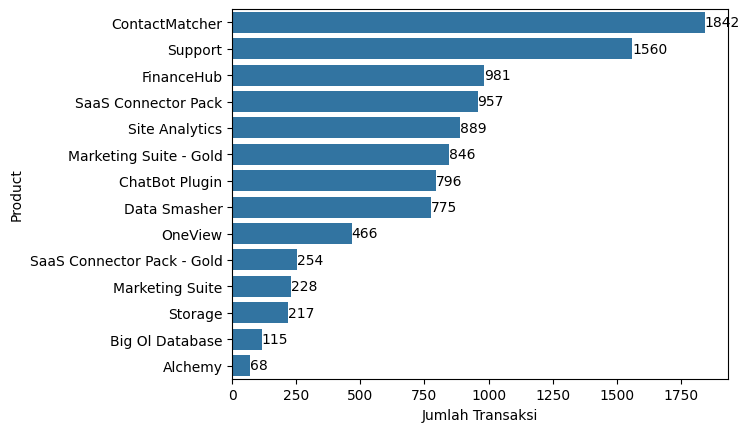

In [215]:
jumlahtransaksi = sns.barplot(y = jumlahproduct['Product'], x = jumlahproduct['Jumlah Transaksi'])
jumlahtransaksi.bar_label(jumlahtransaksi.containers[0])
plt.show()

Insight:
- Terdapat 14 product dalam dataset ini
- `ContactMatcher` merupakan produk paling laku berdasarkan jumlah transaksi
- `Alchemy` merupakan produck paling tidak laku berdasarkan jumlah transaksi
- rentang Total transaksi antar produk bisa dikatakan sangat jauh, yaitu terpaut 1842 - 68 = 1774 transaksi

Kesimpulan:
- Product dengan prospek pertumbuhan tinggi berdasarkan jumalh transaksi adalah `ContactMatcher`
- Product yang rendah berdasarkan jumlah transaksi adalah `Alchemy`

Selanjutny kita akan cari most benefit product berdasarkan profit sekaligus menampilkan sales setiap transaksi.

#### Product Paling menguntungkan

In [216]:
mostbenefit_product = data.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit', ascending=False).reset_index()
mostbenefit_product

,Product,Sales,Profit
0,Alchemy,149528.0300,55617.8249
1,Site Analytics,330007.0540,44515.7306
2,Data Smasher,167380.3180,41936.6357
3,Support,125152.7440,32864.4698
4,FinanceHub,340935.4150,32136.4203
5,Marketing Suite - Gold,223843.6080,21278.8264
6,OneView,107532.1610,18138.0054
7,SaaS Connector Pack,91705.1640,13059.1436
8,ContactMatcher,410378.2650,12496.2822
9,SaaS Connector Pack - Gold,16476.4020,6964.1767


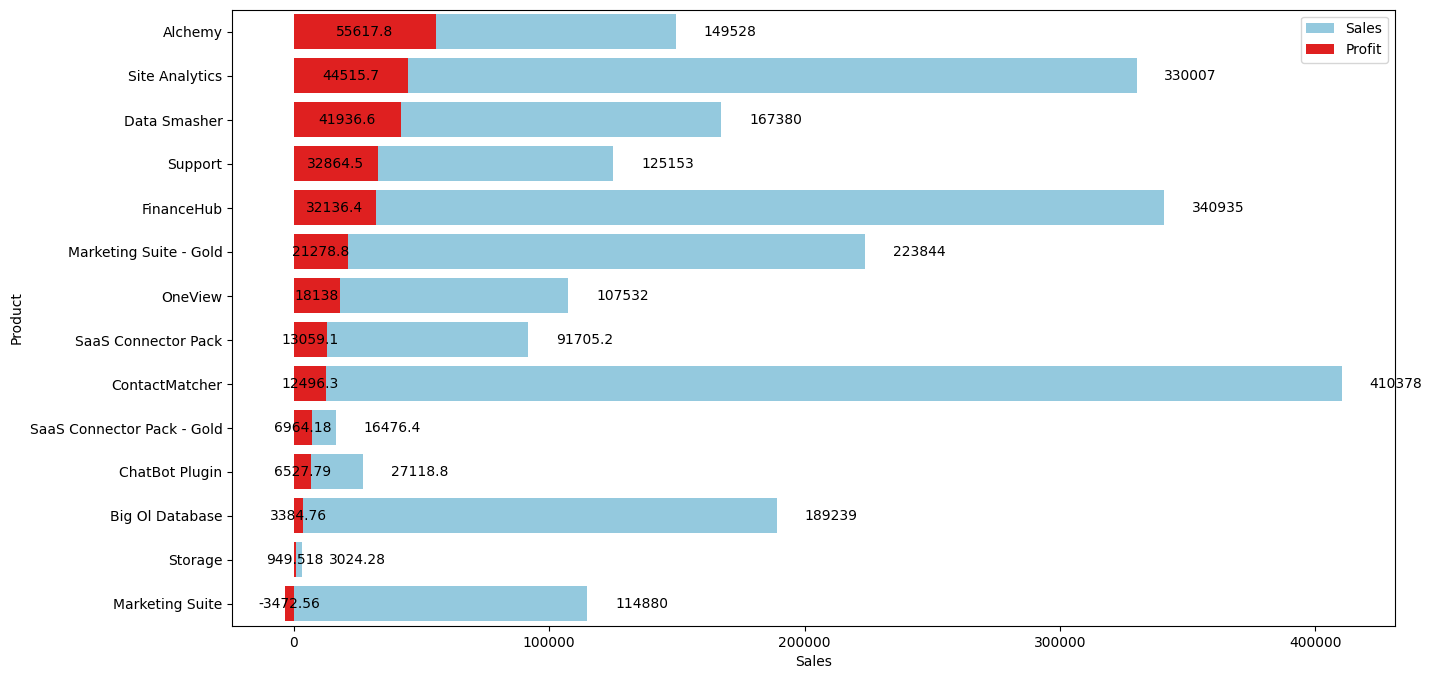

In [217]:
plt.figure(figsize=(15, 8))
sales = sns.barplot(x= 'Sales', y= 'Product', data = mostbenefit_product, color= 'skyblue', label= 'Sales', dodge= False)
sales.bar_label(sales.containers[0], padding= 20)

profit = sns.barplot(x= 'Profit', y= 'Product', data = mostbenefit_product, color= 'red', label= 'Profit', dodge= False)
profit.bar_label(profit.containers[1], label_type='center')
plt.legend()


Insights:

- Sesuai dengan korelasi yang dilakukan sebelumnya, bahwa Sales dan Profit memiliki hubungan positif (satu arah) yang menengah. karena tidak sepenuhnya ketika Sales naik, Profit juga naik
- Alchemy merupakan product yang paling berkontribusi terhadap total keuntungan. Terlebih lagi bahwa sesuai analisis sebelumnya Alchemy merupakan product dengan `jumlah transaksi paling sedikit` namun dapat mencapai `profit tertinggi`.
- ContactMather yang memiliki sales tertinggi seusai dengan jumlah transaksinya yang juga sebagai product paling banyak ditransaksikan.
- Marketing Suite merupakan product yang memiliki profit terendah bahkan minus. namun, dalam sales tidak merupakan yang terendah
- Storage merupakan product yang memiliki sales paling sedikit sekaligus profit paling sedikit yang tidak minus

Kesimpulan:
- Product dengan prospek pertumbuhan tinggi berdasarkan Sales adalah `ContactMatcher`
- Product dengan prospek pertumbuhan tinggi berdasarkan Profit adalah `Alchemy`
- Product dengan keuntungan Minus adalah `Marketing Suite`
- Product dengan keuntungan terendah adalah `Storage`

Selanjutnya kita akan melihat product yang laku berdasarkan `Quantity` dalam 1 transaksi

In [218]:
jumlahquantity = data.groupby('Product').agg({'Profit': 'sum', 'Quantity': 'sum'}).reset_index().sort_values('Quantity')
jumlahquantity

,Product,Profit,Quantity
0,Alchemy,55617.8249,234
1,Big Ol Database,3384.7569,440
6,Marketing Suite,-3472.5560,868
10,SaaS Connector Pack - Gold,6964.1767,906
12,Storage,949.5182,914
8,OneView,18138.0054,1729
4,Data Smasher,41936.6357,2976
2,ChatBot Plugin,6527.7870,3000
7,Marketing Suite - Gold,21278.8264,3158
11,Site Analytics,44515.7306,3289


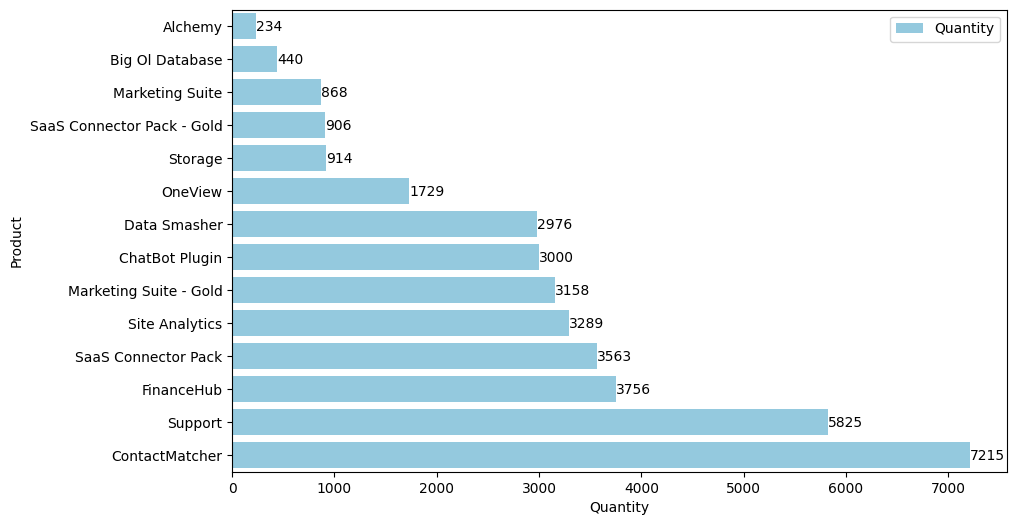

In [233]:
plt.figure(figsize=(10, 6))

sales = sns.barplot(x= 'Quantity', y= 'Product', data = jumlahquantity, color= 'skyblue', label= 'Quantity', dodge= False)
sales.bar_label(sales.containers[0], label_type='edge')

plt.legend()

Insights:

- total quantity adalah total penjumlahan dari jumlah licensi product yang dipesan dalam 1 transaksi.
- Alchemy masih merupakan product yang paling sedikit dipesan berdasarkan total quantity. 
- ContactMatcher merupakan product yang paling banyak dipesan berdasarkan total quantity.
- rentang jumalh pemesanan produck juga terbilang terpaut jauh yakni, 7215 - 234 = 6981 license.

Kesimpulan:



### **Menganalisis Kemungkinan Push Profit dengan Menaikkan Harga Pada Customer dan Produt tertentu**

Mencari Customer - customer yang memberikan kontribusi terbesar terhadap keuntungan keseluruhan dengan masing-masing jumlah ordernya

In [ ]:
a = data.groupby(['Customer']).agg({'Discount' : 'median', 'Order ID' : 'count', 'Sales' : 'sum', 'Profit' : 'sum'}).sort_values('Profit', ascending= False).head(20).reset_index()
a

,Customer,Discount,Order ID,Sales,Profit
0,Valero Energy,0.10,105,41220.4188,10308.6297
1,Coca-Cola,0.20,81,28643.8040,9449.0246
2,Trafigura Group,0.00,103,33447.1270,8867.8252
3,Mondelez International,0.20,143,32993.0458,8577.6524
4,Lowes,0.20,110,40360.1630,7937.4915
5,Lukoil,0.20,116,35199.1830,7117.0922
6,Siemens,0.15,170,36008.3686,6519.5105
7,Bank of America Corp.,0.00,132,41255.9471,6449.8554
8,Kroger,0.00,135,29783.4590,6256.1005
9,Anthem,0.00,134,55719.2100,5953.2038


selanjutnya kita akan menerapkan bar plot pada data diatas untuk melihat keterkaitan var ```Profit``` dengan ```Sales``` setiap transaksi

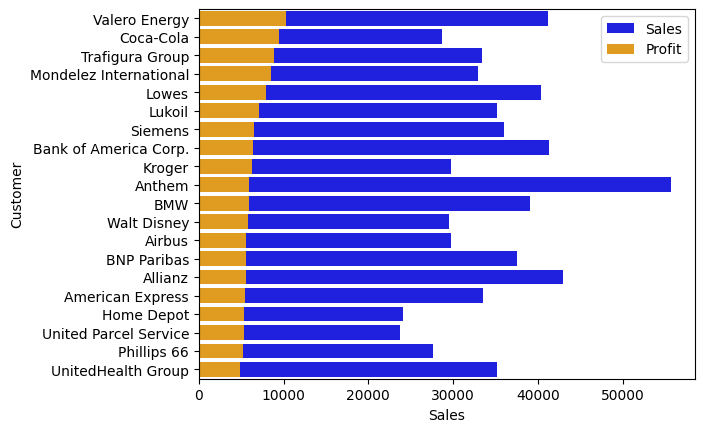

In [ ]:
sns.barplot(y= 'Customer', x= 'Sales', data = a, color='blue', label = 'Sales')
sns.barplot(y= 'Customer', x= 'Profit', data = a, color='orange', label = 'Profit')
plt.legend()

kita akan lihat dari sudut pandang produk untuk produk yang paling banyak dibeli dalam 1 transaksi. Agar dapat menaikkan harga atau mengurangi diskon untuk push profit

In [ ]:

a = data.groupby(['Order ID', 'Customer', 'Product'])['Quantity'].sum().reset_index(name='Total Quantity').sort_values('Total Quantity', ascending= False).head(25)
a

,Order ID,Customer,Product,Total Quantity
2123,AMER-2022-165330,ConocoPhillips,ContactMatcher,26
6106,EMEA-2021-109470,Goldman Sachs Group,ContactMatcher,24
3992,APJ-2021-146563,Tyson Foods,Marketing Suite - Gold,21
1141,AMER-2021-149713,Itochu,Support,20
7654,EMEA-2022-162390,McKesson,ContactMatcher,20
7776,EMEA-2023-100111,Wells Fargo,FinanceHub,20
6900,EMEA-2022-108504,Mitsubishi,Support,19
5497,EMEA-2020-124737,AT&T,Support,19
5072,APJ-2023-151750,Cisco Systems,ContactMatcher,19
7143,EMEA-2022-125738,J.P. Morgan Chase & Co.,Support,19


<Axes: xlabel='Total Quantity', ylabel='Product'>

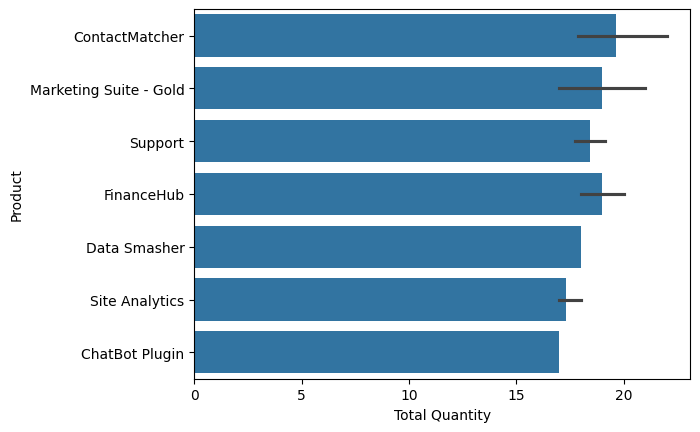

In [ ]:
sns.barplot(x= 'Total Quantity', y= 'Product', data = a)

Kesimpulan:
- Disini dapat dilihat bahwa ```Valero Energy``` merupakan customer yang paling banyak mendatangkan ```total profit``` walaupun ```total sales``` bukan merupakan yang tertinggi.
- Sales tidak berbanding lurus dengan Profit dipengaruhi faktor diskon yang diberikan dan juga bisa pada harga pokok produk yang tidak diketahui pada dataset ini.
- produk yang cenderung diorder dalam jumlah banyak dalam 1 transaksi dapat dijadikan acuan untuk menaikkan harga

Saran:
- Untuk memaksimalkan Profit, dapat dilakukan kenaikan harga produk disetiap transaksi terutama produk yang cenderung diorder dalam jumlah banyak dalam 1 transaksi yang dilakukan pada setiap top 20 Customer diatas

### **Mencari Faktor Penyebab Minus Profit (Rugi) pada setiap transaksi**

Pertama kita melihat berapa total transaksi yang rugi dari seluruh dataset

In [ ]:
totalkerugian = data[data['Profit'] < 0]['Profit'].sum()
totalkerugian

-156131.2857

In [ ]:
totalkeuntungan = data[data['Profit'] > 0]['Profit'].sum()
totalkeuntungan

442528.3074

In [ ]:
abs(totalkerugian/totalkeuntungan)*100

35.28164935195285

Kita bisa lihat bahwa total kerugian dari seluruh transaksi sangat besar hingga 35,3% dari jumlah keuntungan

Selanjutnya berdasarkan total profit apakah ada customer yang total ```profitnya bernilai minus```. Ini artinya Customer tersebut dianggap sebagai customer yang ```tidak produktif``` sebagai partner B2B

In [ ]:
data.groupby(['Customer']).agg({'Order ID': 'count', 'Sales': 'sum', 'Profit': 'sum'}).sort_values('Profit').head(15)

,Order ID,Sales,Profit
Customer,,,
Allstate,105,39941.6400,-2796.2935
Bosch,119,25444.9990,-1823.7794
Nissan Motor,70,22650.8206,-1585.1886
Costco Wholesale,62,21796.7020,-1354.8547
Walgreens,68,14420.6190,-740.6747
Sprint Nextel,101,18852.0750,-462.6587
Morgan Stanley,126,28631.4500,-361.8099
HonHai Precision Industry,88,18457.4150,-136.6992
HSBC Holdings,83,22703.8405,-104.4022


Dari table diatas terdapat 10 customer yang menghasilkan total profit minus bahkan dari seluruh transaksi yang dilakukan.
oleh karna itu pertama kita akan lihat faktor diskon dalam mengurangi profit

In [ ]:
data[data['Profit'] < 0].groupby('Discount').agg({'Discount' : 'count', 'Sales': 'median', 'Profit': 'median'}).rename(columns={'Discount': 'much used'}).sort_values('Discount', ascending= False)

,much used,Sales,Profit
Discount,,,
0.80,300,8.7010,-14.04980
0.70,418,12.2940,-9.20230
0.60,138,22.4940,-12.06170
0.50,66,301.9600,-185.27670
0.45,11,383.4380,-167.31840
0.40,180,313.1760,-80.45175
0.32,27,328.3992,-46.97640
0.30,208,344.3720,-29.26500
0.20,502,140.7560,-15.04285


In [ ]:
data.groupby(['Discount'])[['Price', 'Profit']].median().sort_values('Profit')

,Price,Profit
Discount,,
0.50,181.765,-185.2767
0.45,218.750,-167.3184
0.40,179.990,-57.6242
0.32,180.980,-46.9764
0.30,147.830,-25.3764
0.80,11.500,-14.0498
0.60,18.940,-12.0617
0.70,11.730,-9.2023
0.20,19.990,6.4944


In [ ]:
data.groupby(['Product'])[['Price']].nunique()

,Price
Product,
Alchemy,19
Big Ol Database,79
ChatBot Plugin,169
ContactMatcher,634
Data Smasher,192
FinanceHub,172
Marketing Suite,67
Marketing Suite - Gold,214
OneView,204


In [ ]:
data.groupby(['Customer'])[['Order ID']].count().sort_values('Order ID')

,Order ID
Customer,
Citigroup,22
Berkshire Hathaway,39
Safeway,39
Alphabet,44
Tesco,48
...,...
Comcast,161
Siemens,170
Ford Motor,176


In [ ]:
data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

,Region,Sales,Profit
0,AMER,8.378496e+05,127426.9898
1,APJ,4.154642e+05,11513.9869
2,EMEA,1.043887e+06,147456.0450


In [ ]:
data.groupby(['Customer', 'Order Date']).agg({'Sales': 'sum'}).reset_index()

,Customer,Order Date,Sales
0,AT&T,2020-03-11,7.980
1,AT&T,2020-03-14,13.940
2,AT&T,2020-04-04,18.900
3,AT&T,2020-08-23,424.376
4,AT&T,2020-08-26,176.800
...,...,...,...
4854,Wells Fargo,2023-09-21,7359.918
4855,Wells Fargo,2023-10-07,681.910
4856,Wells Fargo,2023-11-27,265.408
4857,Wells Fargo,2023-12-08,19.104


In [ ]:
data.groupby(['Country', 'City'])['Customer'].nunique().reset_index(name='Unique Customer Count')

,Country,City,Unique Customer Count
0,Argentina,Buenos Aires,23
1,Argentina,Córdoba,14
2,Argentina,Mendoza,10
3,Argentina,Rosario,10
4,Australia,Adelaide,7
...,...,...,...
257,United States,Tucson,1
258,United States,Tulsa,1
259,United States,Virginia Beach,3
260,United States,Wilmington,1


In [ ]:
data.groupby(['Customer', 'Industry'])['Segment'].nunique().reset_index(name='Unique Segment Count')

,Customer,Industry,Unique Segment Count
0,AT&T,Communications,3
1,Abbott Laboratories,Healthcare,3
2,Aetna,Healthcare,2
3,Airbus,Manufacturing,3
4,Allianz,Finance,2
...,...,...,...
94,Volkswagen,Manufacturing,3
95,Walgreens,Retail,3
96,Walmart,Retail,3
97,Walt Disney,Communications,3


In [ ]:
data.groupby('Product').agg({'Price': 'sum', 'Discount': 'median'}).reset_index().sort_values('Discount')

,Product,Price,Discount
2,ChatBot Plugin,7620.60,0.0
4,Data Smasher,46092.21,0.0
7,Marketing Suite - Gold,64414.85,0.0
8,OneView,33734.81,0.0
9,SaaS Connector Pack,28811.83,0.0
10,SaaS Connector Pack - Gold,5175.88,0.0
12,Storage,778.40,0.0
13,Support,37341.88,0.0
0,Alchemy,47999.32,0.2
1,Big Ol Database,73744.11,0.2


In [ ]:
data.groupby(['Industry', 'Segment'])['Customer'].nunique().reset_index(name='Customer Count').sort_values('Customer Count', ascending= False)

,Industry,Segment,Customer Count
10,Finance,SMB,20
11,Finance,Strategic,18
8,Energy,Strategic,14
7,Energy,SMB,13
9,Finance,Enterprise,13
25,Tech,SMB,13
24,Tech,Enterprise,11
22,Retail,SMB,11
14,Healthcare,Strategic,10
23,Retail,Strategic,10


In [ ]:
data.groupby(['Segment', 'Industry'])[['Customer']].nunique().sort_values(['Segment','Customer'], ascending= False)

Customer
Segment    Industry                   
Strategic  Finance                  18
           Energy                   14
           Healthcare               10
           Manufacturing            10
           Retail                   10
           Tech                     10
           Consumer Products         9
           Communications            5
           Transportation            3
           Misc                      2
SMB        Finance                  20
           Energy                   13
           Tech                     13
           Retail                   11
           Manufacturing            10
           Consumer Products         9
           Healthcare                9
           Communications            5
           Transportation            4
           Misc                      2
Enterprise Finance                  13
           Tech                     11
           Energy                   10
           Manufacturing            10
           Retail                   10
           Healthcare                7
           Consumer Products         5
           Communications            4
           Transportation            4
           Misc                      2

In [ ]:
data.groupby('Segment')[['Customer']].nunique()

,Customer
Segment,
Enterprise,76
SMB,96
Strategic,91


#### Mengetahui Industri apa yang paling laris berdasarkan jumlah customer dan jumlah order pada masing - masing Industry

In [ ]:
data.groupby('Industry').agg({'Customer':'nunique', 'Order ID':'count'})

,Customer,Order ID
Industry,,
Communications,5,593
Consumer Products,9,1021
Energy,14,1316
Finance,20,2127
Healthcare,10,1049
Manufacturing,11,1222
Misc,2,107
Retail,11,972
Tech,13,1236


In [ ]:
data.groupby(['Order ID', 'Customer', 'Discount'])['Profit'].sum().reset_index(name='Total Profit').sort_values('Total Profit')

,Order ID,Customer,Discount,Total Profit
1010,AMER-2022-108196,Allstate,0.7,-6904.3700
6375,EMEA-2023-168116,Costco Wholesale,0.5,-3839.9904
2685,APJ-2020-169019,Bosch,0.8,-3754.1572
6001,EMEA-2023-134845,FedEx,0.7,-3431.6122
3519,APJ-2023-122714,Ford Motor,0.8,-2929.4845
...,...,...,...,...
3959,EMEA-2020-116904,Anthem,0.0,4668.6935
1108,AMER-2022-117121,Valero Energy,0.0,4946.3700
3825,APJ-2023-166709,Lowes,0.0,5039.9856
2074,AMER-2023-140151,Mondelez International,0.0,6734.4720


#### Useless

In [ ]:
data.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

,Order Date,Sales,Profit
0,2020-01-04,16.4480,5.5512
1,2020-01-05,288.0600,-65.9901
2,2020-01-06,19.5360,4.8840
3,2020-01-07,4407.1000,1358.0524
4,2020-01-08,87.1580,-71.9621
...,...,...,...
1232,2023-12-27,814.5940,61.1202
1233,2023-12-28,177.6360,-31.9742
1234,2023-12-29,1657.3508,253.1188
1235,2023-12-30,2915.5340,644.4338


In [ ]:
data.groupby('Customer')['Contact Name'].nunique().reset_index(name='Total Contact')

,Customer,Total Contact
0,AT&T,9
1,Abbott Laboratories,5
2,Aetna,11
3,Airbus,8
4,Allianz,15
...,...,...
94,Volkswagen,10
95,Walgreens,5
96,Walmart,8
97,Walt Disney,9


In [236]:
data.groupby('Product')[['Order ID']].count().reset_index()

,Product,Order ID
0,Alchemy,68
1,Big Ol Database,115
2,ChatBot Plugin,796
3,ContactMatcher,1842
4,Data Smasher,775
5,FinanceHub,981
6,Marketing Suite,228
7,Marketing Suite - Gold,846
8,OneView,466
9,SaaS Connector Pack,957


# **Conclution & Recommendation**